In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


Bad key savefig.frameon in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matp

In [2]:
train = pd.read_csv('mushroom_train.csv')
test=pd.read_csv('mushroom_test.csv')
train_y= train['class_edible']
train_x= train.drop(['class_edible'], axis=1)
test_y= test['class_edible']
test_x = test.drop(['class_edible'], axis=1)

In [4]:
train.columns

Index(['class_edible', 'cap-shape_bell', 'cap-shape_conical',
       'cap-shape_convex', 'cap-shape_flat', 'cap-shape_knobbed',
       'cap-shape_sunken', 'cap-surface_fibrous', 'cap-surface_grooves',
       'cap-surface_scaly',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=117)

In [5]:
rModel = linear_model.LogisticRegression(C=1)

In [6]:
model = rModel.fit(train_x, train_y)

In [7]:
y_pred= model.predict(test_x)

In [8]:
print(accuracy_score(y_pred, test_y))

1.0


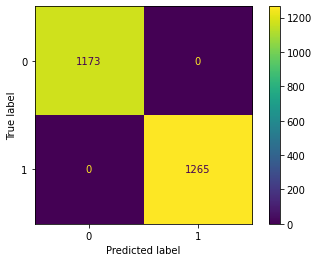

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rModel, test_x, test_y)

In [10]:
svm = SVC()

In [11]:
svm.fit(train_x, train_y)

SVC()

In [12]:
print(accuracy_score(svm.predict(test_x), test_y))

1.0


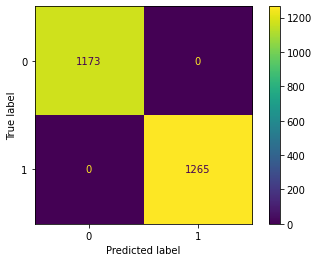

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, test_x, test_y)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

In [15]:
print(accuracy_score(knn.predict(test_x), test_y))

1.0


It is seen that the accuracy score is 1 in case of logistic regression and K nearest classifiers.

It is an indicative of data leakage happening with the source data chosen.